# Notebook

This notebook creates a figure. It requires outputs produced by running the script ```script.sh```.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from src import utils
from IPython.display import clear_output

sns.set_theme(context='paper', style='ticks', font_scale=1)

In [3]:
name="experiment"
width_pt = 469
palette = sns.color_palette('husl', 3)
type_dict = {
    'N' : int, 
    'ar_mean' : float,
    'geo_mean' : float,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        
        for seed in js['seeds']:
            seed_js = js.copy()
            seed_js.pop('seeds', None) 
            seed_js = seed_js | js['seeds'][seed]
            seed_js['seed']=seed

            dicts.append(seed_js)

raw_df = pd.DataFrame(dicts)

Reading file 3/3


In [5]:
input_df = raw_df.astype(type_dict) # Fix types

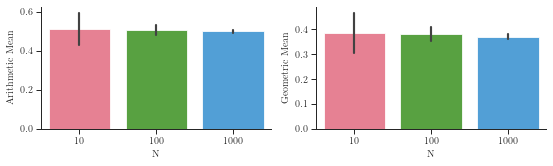

In [8]:
utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(2*fig_width, fig_height))

# Draw Axis 1
sns.barplot(data=input_df, x="N", y="ar_mean", ci='sd', palette=palette, ax=ax1)
sns.despine(ax=ax1)

ax1.set_xlabel("N")
ax1.set_ylabel("Arithmetic Mean")

# Draw Axis 2
sns.barplot(data=input_df, x="N", y="geo_mean", ci='sd', palette=palette, ax=ax2)
sns.despine(ax=ax2)

ax2.set_xlabel("N")
ax2.set_ylabel("Geometric Mean")

fig.tight_layout()
fig.savefig('figures/figure.pdf', dpi=300)